Digite 1 para método linear, 2 para metodo quadrático, 3 para método quadrático robusto: 3
Analise aplicando MMQ robusto:

----------------
Equação 1: Y(x)=1.359624838043471x + -2479.2963361956386
Equação final: Y(x)=1.360193462232781x + -2480.197630294915
Previsão 2020:  267.3931634153023 milhões de pessoas


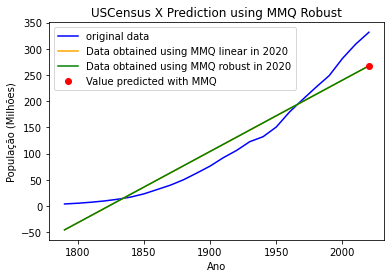

Diferenca : 0.24732676312942203


In [41]:
import csv
import matplotlib.pyplot as plt


def MMQ_Linear():
  print("Analise aplicando MMQ linear:")
  print()
  with open('USCensus.csv', 'r') as arquivo:
    leitor = csv.reader(arquivo)
    count=0
    v1=[]
    v2=[]
    for row in leitor:
      if count!=0:
        v1.append(int(row[0]))
        v2.append(float(row[1]))
        
        count+=count
      else:
        count=1
  print("----------------")

  #print('v1: ', v1)
  #print('v2: ', v2)

  x1=0
  x2=0
  y1=0
  y2=0
  z1=0
  z2=0
  
  for i in range(0, len(v1)):
    x1+=v1[i]*v1[i]
    x2+=v1[i]*1
    y1+=1*v1[i]
    y2+=1*1
    z1+=v1[i]*v2[i]
    z2+=1*v2[i]
  
  #Método algébrico
  c1=(z1*y2-x2*z2)/(y2*x1-x2*y1)
  c2=(z2-y1*c1)/y2
  
  #print("Parametro 1: " + str(c1))
  #print("Parametro 2: " + str(c2))
  
  
  print("Equação final: Y(x)="+str(c1)+"x + "+str(c2))
  prediction=c1*2020+c2
  print('Previsão 2020: ', prediction, 'milhões de pessoas')
  
  v1.append(int(2020))
  v2.append(float(331.449281))
  v3=[]
  for i in range(len(v1)):
    v3.append(c1*float(v1[i])+c2) 
  
  plt.plot(v1,v2,color='blue', label='original data')
  plt.plot(v1,v3,color='green', label='Data obtained using MMQ in 2020')
  plt.plot(2020,prediction,'ro', label='Value predicted with MMQ')
  plt.plot()
  plt.xlabel('Ano')
  plt.ylabel('População (Milhões)')
  plt.title("USCensus X Prediction using MMQ Linear")
  plt.legend()
  plt.show()


def MMQ_Quadratico():
  print("Analise aplicando MMQ Quadrático:")
  print()
  with open('USCensus.csv', 'r') as arquivo:
    leitor = csv.reader(arquivo)
    leitor=list(leitor)
    count=0
    x2=[]
    x=[]
    y=[[0 for _ in range(1)] for _ in range((len(leitor)-1))]
    z=[]
    for row in leitor:
      if count!=0:
        x2.append(int(row[0])*int(row[0]))
        x.append(int(row[0]))
        y[count-1][0]=float(row[1])
        z.append(float(row[1]))
        count=count+1
      else:
        count=1
  print("----------------")
  #print('x2: ', x2)
  #print('x: ', x)
  #print('y: ', y)

  #----------------criando V(matriz)
  v=[[0 for _ in range(3)] for _ in range(len(x))]
  #print(v)
  for i in range(len(x)):
    v[i][0]=x2[i]
    v[i][1]=x[i]
    v[i][2]=int(1)
 
  vt=[[0 for _ in range(len(x))] for _ in range(3)]
  for i in range(len(x)):
    vt[0][i]=x2[i]
    vt[1][i]=x[i]
    vt[2][i]=int(1) 

  #--------------multiplicanto vt*v
  matriz1=multiplica_matriz(vt,v)
  #--------------multiplicando vt*y
  matriz2=multiplica_matriz(vt,y)
  #--------------calculando inverso de Vt*V
  matriz1_inverso=MInversa(matriz1)
  #--------------Calculando Matriz_Inversa*Y
  matriz_final=multiplica_matriz(matriz1_inverso,matriz2)
  #--------------armazenando parâmetros:
  c2=matriz_final[0][0]
  c1=matriz_final[1][0]
  c0=matriz_final[2][0]

  print("Equação encontrada:")
  print("Y(x)= ",c2,"*x2+ ",c1,"*x+ ",c0)
  prediction=c2*2020*2020+c1*2020+c0
  print('Previsão 2020: ', prediction, 'milhões de pessoas')

  x.append(int(2020))
  z.append(float(331.449281))
  v3=[]
  for i in range(len(x)):
    v3.append(c2*float(x[i])*float(x[i])+c1*float(x[i])+c0)
  
  plt.plot(x,z,color='blue', label='original data')
  plt.plot(x,v3,color='green', label='Data obtained using MMQ in 2020')
  plt.plot(2020,prediction,'ro', label='Value predicted with MMQ squared')
  plt.plot()
  plt.xlabel('Ano')
  plt.ylabel('População (Milhões)')
  plt.title("USCensus X Prediction using MMQ Squared")
  plt.legend()
  plt.show()
  
def MMQ_Robusto():
  print("Analise aplicando MMQ robusto:")
  print()
  with open('USCensus.csv', 'r') as arquivo:
    leitor = csv.reader(arquivo)
    count=0
    v1=[]
    v2=[]
    for row in leitor:
      if count!=0:
        v1.append(int(row[0]))
        v2.append(float(row[1]))
        
        count+=count
      else:
        count=1
  print("----------------")

  #print('v1: ', v1)
  #print('v2: ', v2)

  x1=0
  x2=0
  y1=0
  y2=0
  z1=0
  z2=0
  
  for i in range(0, len(v1)):
    x1+=v1[i]*v1[i]
    x2+=v1[i]*1
    y1+=1*v1[i]
    y2+=1*1
    z1+=v1[i]*v2[i]
    z2+=1*v2[i]
  
  #Método algébrico
  c1=(z1*y2-x2*z2)/(y2*x1-x2*y1)
  c2=(z2-y1*c1)/y2
  
  #print("Parametro 1: " + str(c1))
  #print("Parametro 2: " + str(c2))

  print("Equação 1: Y(x)="+str(c1)+"x + "+str(c2))
    

  diferenca=[]
  v3=[]
  for i in range(len(v1)):
    v3.append(c1*float(v1[i])+c2)
  v3.append(c1*2020+c2)

  for i in range(len(v1)):
    diferenca.append(abs(1./(v3[i]-v2[i])))
  
  for i in range(len(diferenca)):
    if diferenca[i]<0.08:
        diferenca[i]=1
    else:
        diferenca[i]=0
  v5=[]
  v6=[]
  for i in range(len(diferenca)):
    if diferenca[i]==1:
      v5.append(v1[i])
      v6.append(v2[i])

  
  x1=0
  x2=0
  y1=0
  y2=0
  z1=0
  z2=0
  for i in range(0, len(v5)):
    x1+=v5[i]*v5[i]
    x2+=v5[i]*1
    y1+=1*v5[i]
    y2+=1*1
    z1+=v5[i]*v6[i]
    z2+=1*v6[i]
    
  
  #Método algébrico
  c1=(z1*y2-x2*z2)/(y2*x1-x2*y1)
  c2=(z2-y1*c1)/y2
  
  #print("Parametro 1: " + str(c1))
  #print("Parametro 2: " + str(c2))

  print("Equação final: Y(x)="+str(c1)+"x + "+str(c2))
  
  prediction=c1*2020+c2
  print('Previsão 2020: ', prediction, 'milhões de pessoas')
  
  v1.append(int(2020))
  v2.append(float(331.449281))
  v4=[]
  for i in range(len(v1)):
    v4.append(c1*float(v1[i])+c2)


  plt.plot(v1,v2,color='blue', label='original data')
  plt.plot(v1,v3,color='orange', label='Data obtained using MMQ linear in 2020')
  plt.plot(v1,v4,color='green', label='Data obtained using MMQ robust in 2020')
  plt.plot(2020,prediction,'ro', label='Value predicted with MMQ')
  plt.plot()
  plt.xlabel('Ano')
  plt.ylabel('População (Milhões)')
  plt.title("USCensus X Prediction using MMQ Robust")
  plt.legend()
  plt.show()
    
  print("Diferenca :",str(v4[23]-v3[23]))




def transposta(matrix):
    return [[row[i] for row in matrix] for i in range(len(matrix[0]))]

def multiplica(X, Y):
    return [[sum(a*b for a,b in zip(X_row,Y_col)) for Y_col in zip(*Y)] for X_row in X]

def MMenor(m,i,j):
    return [row[:j] + row[j+1:] for row in (m[:i]+m[i+1:])]

def MDeternminante(m):
    # Caso base para matriz 2x2
    if len(m) == 2:
        return (m[0][0]*m[1][1]-m[0][1]*m[1][0])*1.0

    determinante = 0
    for c in range(len(m)):
        determinante += ((-1.0)**c)*m[0][c]*MDeternminante(MMenor(m,0,c))
    return determinante

def MInversa(m):
    determinante = MDeternminante(m)
    # Caso base para matriz 2x2
    if len(m) == 2:
        return [[m[1][1]/determinante, -1*m[0][1]/determinante],
                [-1*m[1][0]/determinante, m[0][0]/determinante]]

    # Encontra os cofatores da matriz
    cofatores = []
    for r in range(len(m)):
        cofatorLinha = []
        for c in range(len(m)):
            menor = MMenor(m,r,c)
            cofatorLinha.append(((-1)**(r+c)) * MDeternminante(menor))
        cofatores.append(cofatorLinha)
    cofatores = transposta(cofatores)
    for r in range(len(cofatores)):
        for c in range(len(cofatores)):
            cofatores[r][c] = cofatores[r][c]/determinante
    return cofatores



def multiplica_matriz(matrizx,matrizy):
  matrizR=[[0 for _ in range(len(matrizy[0]))] for _ in range(len(matrizx))]
  for i in range(len(matrizx)): #altura final
    for c in range(len(matrizx[0])): # larg. da matriz transposta
      for z in range(len(matrizy[0])): #comprimento final
        matrizR[i][z]+=matrizx[i][c]*matrizy[c][z]
  return(matrizR)

selecao=input("Digite 1 para método linear, 2 para metodo quadrático, 3 para método quadrático robusto: ")

if(selecao=='1'):
  MMQ_Linear()
elif(selecao=='2'):
  MMQ_Quadratico()
elif (selecao=='3'):
  MMQ_Robusto()
else:
  print(selecao)
  print("Não foi selecionado valor válido")
